In [39]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\Masuod\Desktop\Exercise\Data Mining\1\Real Data.xlsx'
df = pd.read_excel(file_path)

# Identify the head of the family
df['Head_of_Family'] = df['سرپرست'].apply(lambda x: 'Other' if x == 'دیگری' else x)

# Display the first few rows to verify the new column
print(df[['سرپرست', 'Head_of_Family']].head())

  سرپرست Head_of_Family
0   مادر           مادر
1    پدر            پدر
2   مادر           مادر
3   مادر           مادر
4    پدر            پدر


In [41]:
# Combine both parent job columns
combined_jobs = pd.concat([df['شغل مادر'], df['شغل پدر']])

# Get unique job values
unique_jobs = combined_jobs.unique()
print(unique_jobs)


['at_home' 'health' 'other' 'services' 'teacher' 'others' 'otherr' nan
 'Teacher' 'معلم خصوصی' 'بازنشسته' 'استاد دانشگاه' '"at_home"' 'teacherr'
 'at home' 'athom']


In [ ]:
# Convert all job labels to lowercase and strip extra spaces
df['شغل مادر'] = df['شغل مادر'].str.lower().str.strip()
df['شغل پدر'] = df['شغل پدر'].str.lower().str.strip()

# Remove extra characters, if any
df['شغل مادر'] = df['شغل مادر'].str.replace('[^\w\s]', '')
df['شغل پدر'] = df['شغل پدر'].str.replace('[^\w\s]', '')

# Replace some specific variations of labels with a standard one
replace_dict = {
    'teacherr': 'teacher',
    'at home': 'at_home',
    'athom': 'at_home',
    '"at_home"': 'at_home',
    'استاد دانشگاه': ''
    # ... add more as needed
}

df.replace({'شغل مادر': replace_dict, 'شغل پدر': replace_dict}, inplace=True)

# Check the unique values again
unique_jobs_mother = df['شغل مادر'].unique()
unique_jobs_father = df['شغل پدر'].unique()

print(unique_jobs_mother)
print(unique_jobs_father)


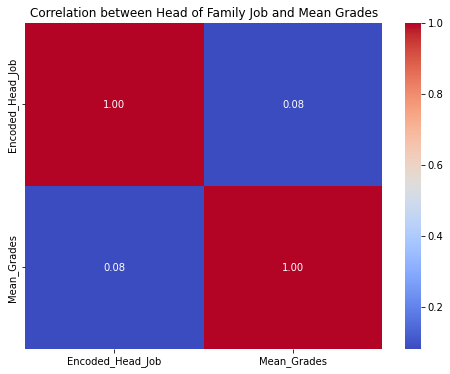

In [40]:
# Encode categorical variables
df['Encoded_Mother_Job'] = df['شغل مادر'].astype('category').cat.codes
df['Encoded_Father_Job'] = df['شغل پدر'].astype('category').cat.codes
df['Encoded_Head_Job'] = df['Head_of_Family'].astype('category').cat.codes

# Calculate mean of grade columns
grade_cols = ['نمره در امتحان اول', 'نمره در امتحان دوم', 'نمره امتحان پایانی']
df['Mean_Grades'] = df[grade_cols].mean(axis=1)

# Merge the relevant columns
correlation_df = df[['Encoded_Head_Job', 'Mean_Grades']]

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Head of Family Job and Mean Grades')
plt.show()
